In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
feature = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
sbmit = pd.read_csv("sampleSubmission.csv")

In [4]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [5]:
df_train.shape

(421570, 5)

In [6]:
df_train["Store"].nunique()

45

In [7]:
df_train["Dept"].nunique()

81

In [8]:
df_test["Store"].nunique()

45

In [9]:
df_test["Dept"].nunique()

81

<Axes: xlabel='Dept', ylabel='count'>

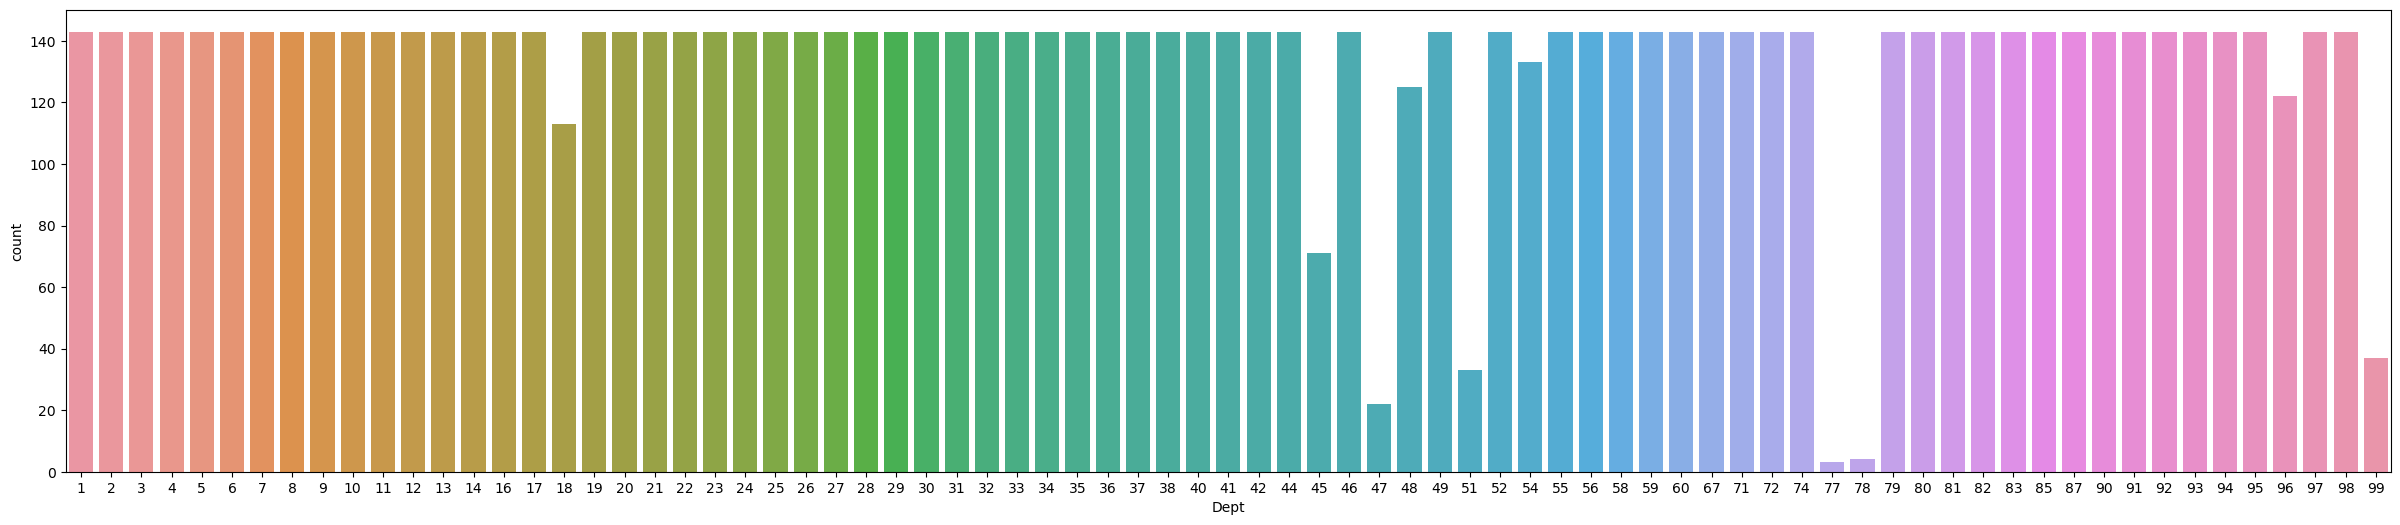

In [10]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"]==1])

<Axes: xlabel='Dept', ylabel='count'>

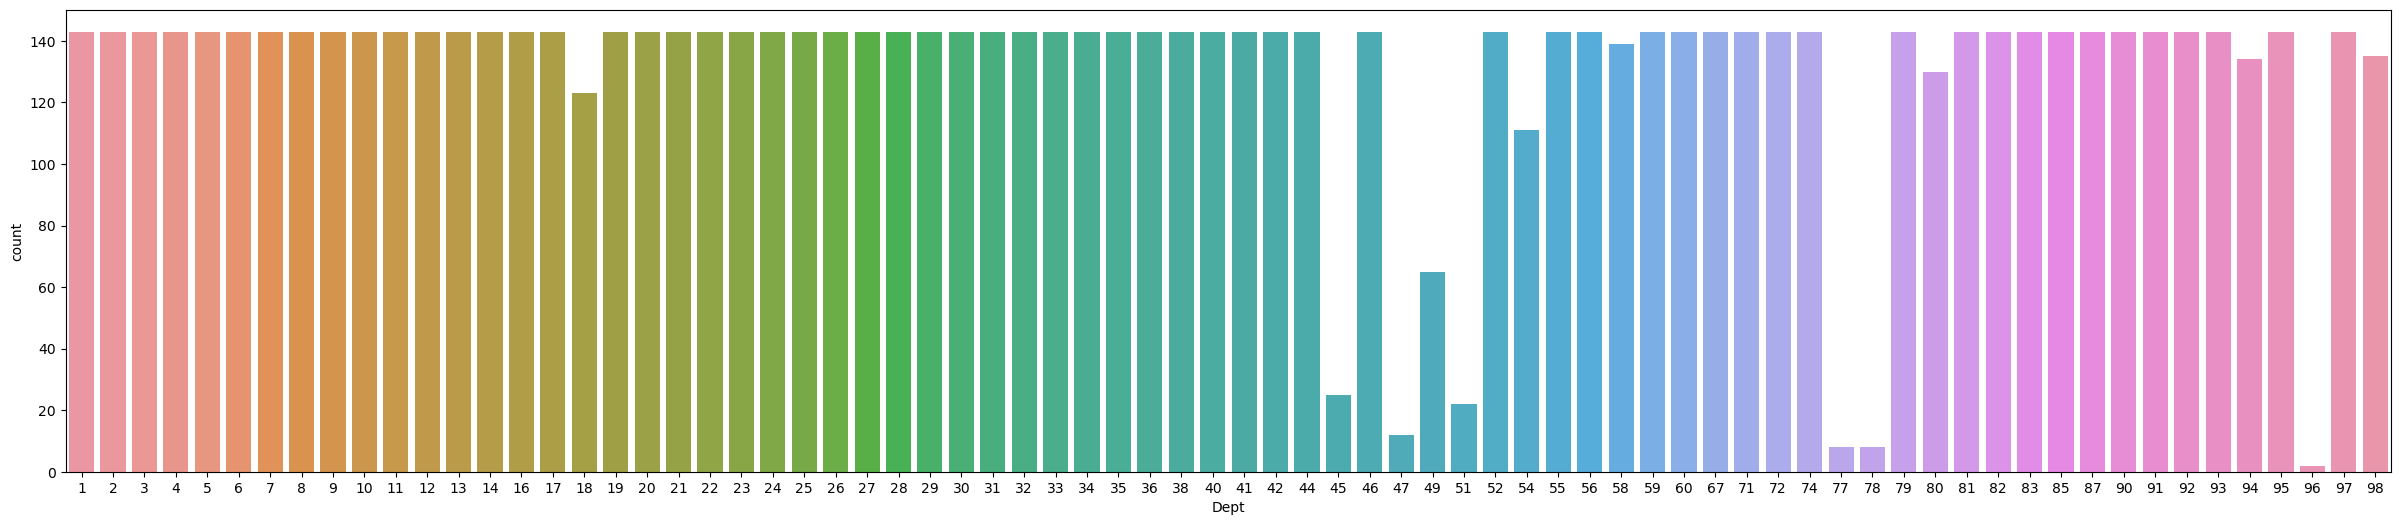

In [11]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"]==45])

<Axes: xlabel='Dept', ylabel='count'>

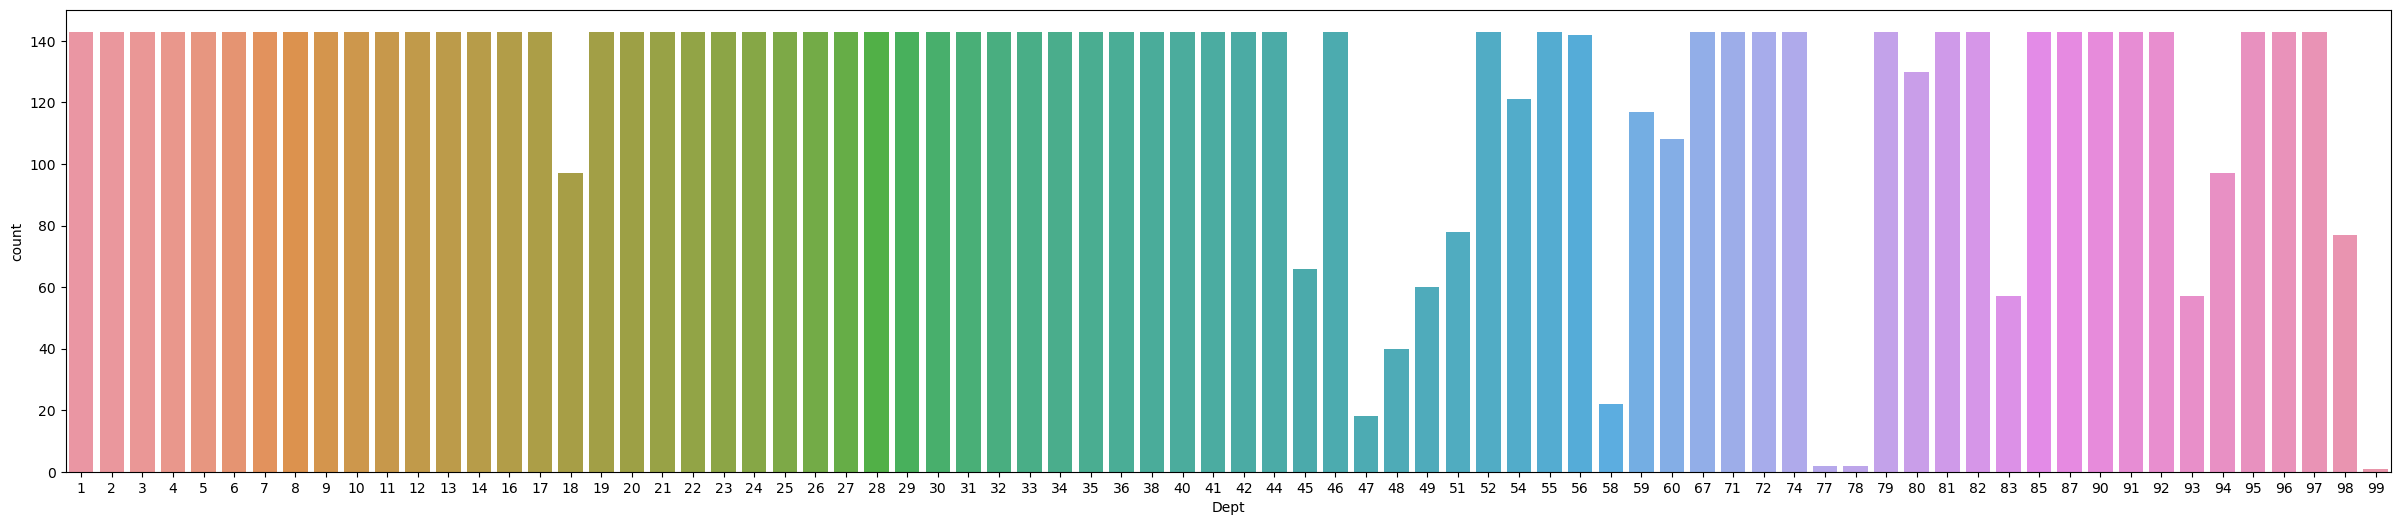

In [12]:
plt.figure(figsize=(30,6))
sns.countplot(x="Dept", data=df_train[df_train["Store"]==16])

<Axes: xlabel='Store', ylabel='count'>

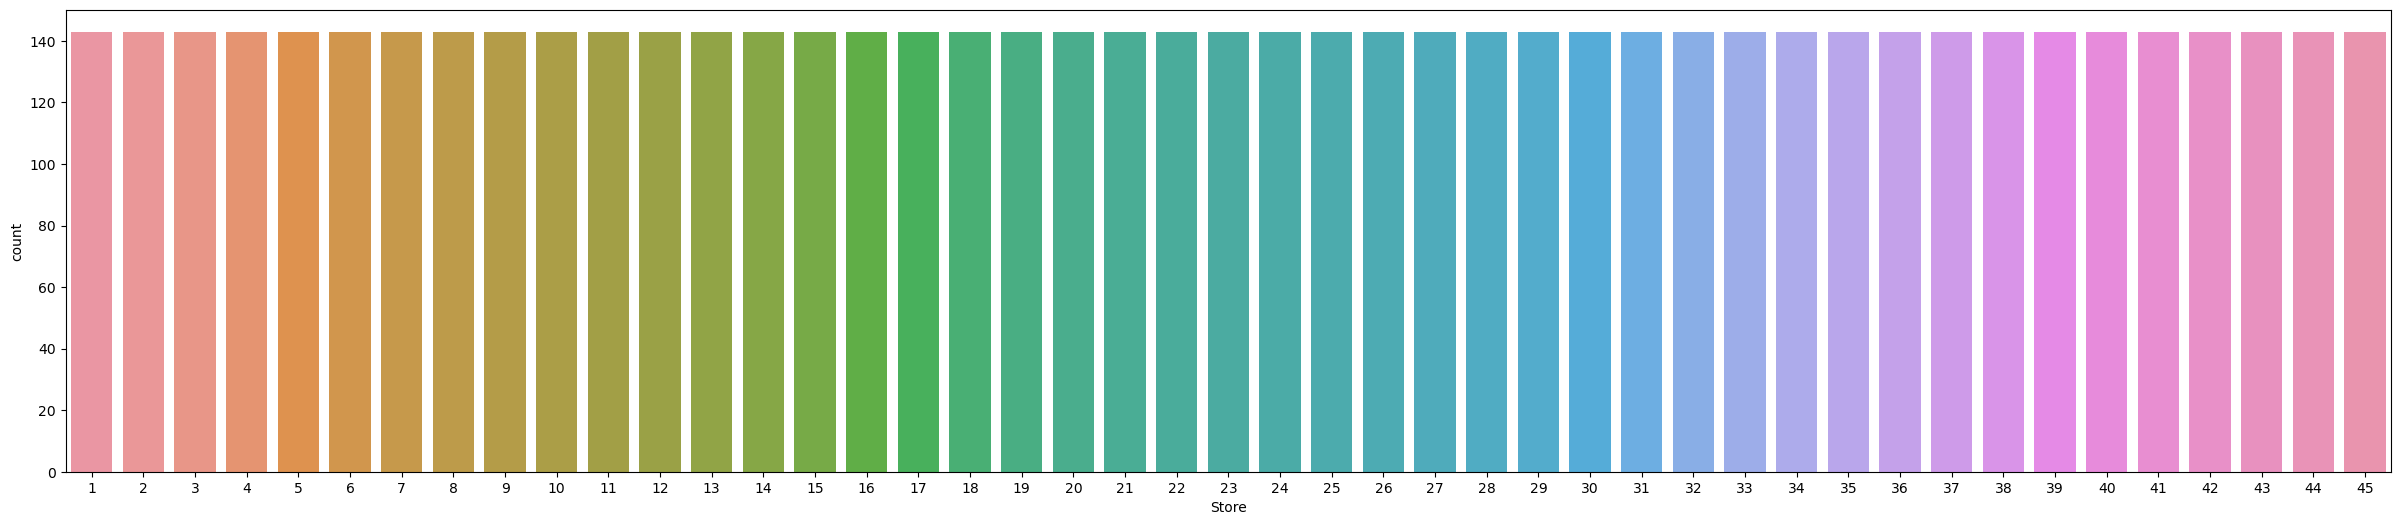

In [13]:
plt.figure(figsize=(30,6))
sns.countplot(x="Store", data=df_train[df_train["Dept"]==16])

<Axes: xlabel='Store', ylabel='count'>

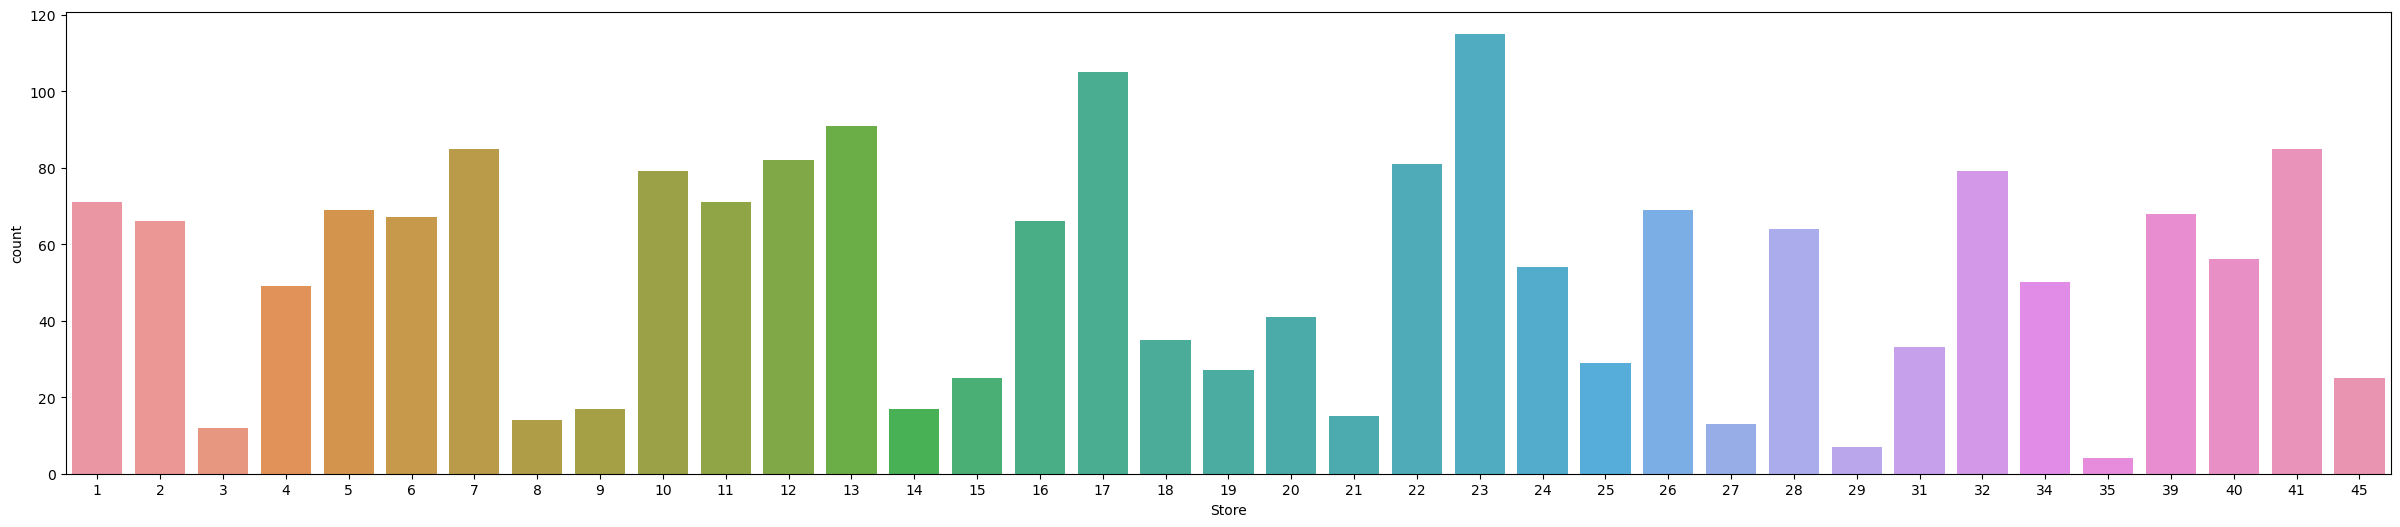

In [14]:
plt.figure(figsize=(30,6))
sns.countplot(x="Store", data=df_train[df_train["Dept"]==45])

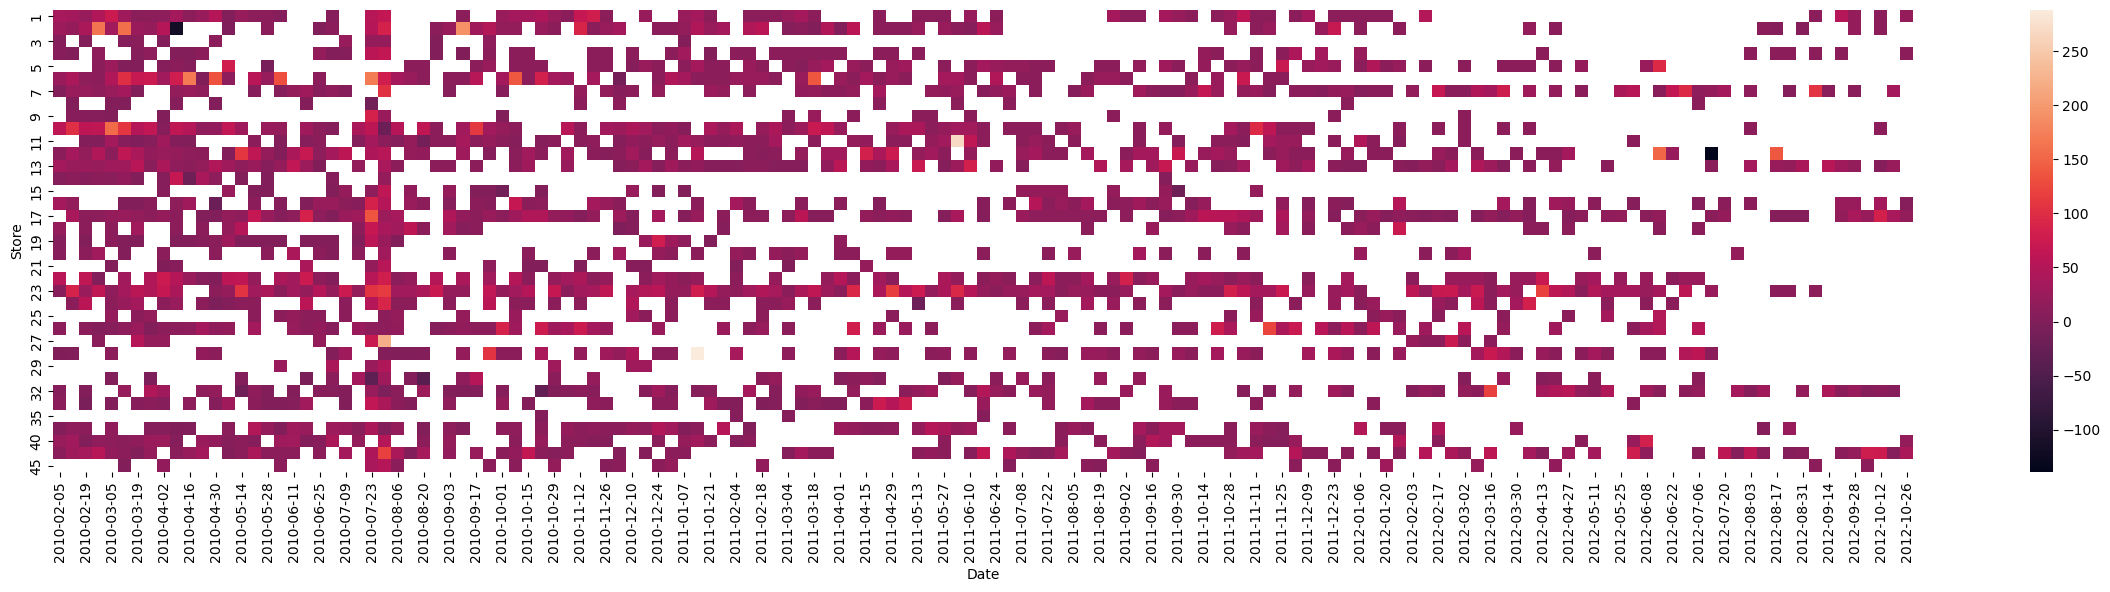

In [15]:
plt.figure(figsize=(30,6))
sns.heatmap(pd.pivot_table(df_train[df_train["Dept"]==45], index="Store", columns="Date", values="Weekly_Sales"))
plt.show()

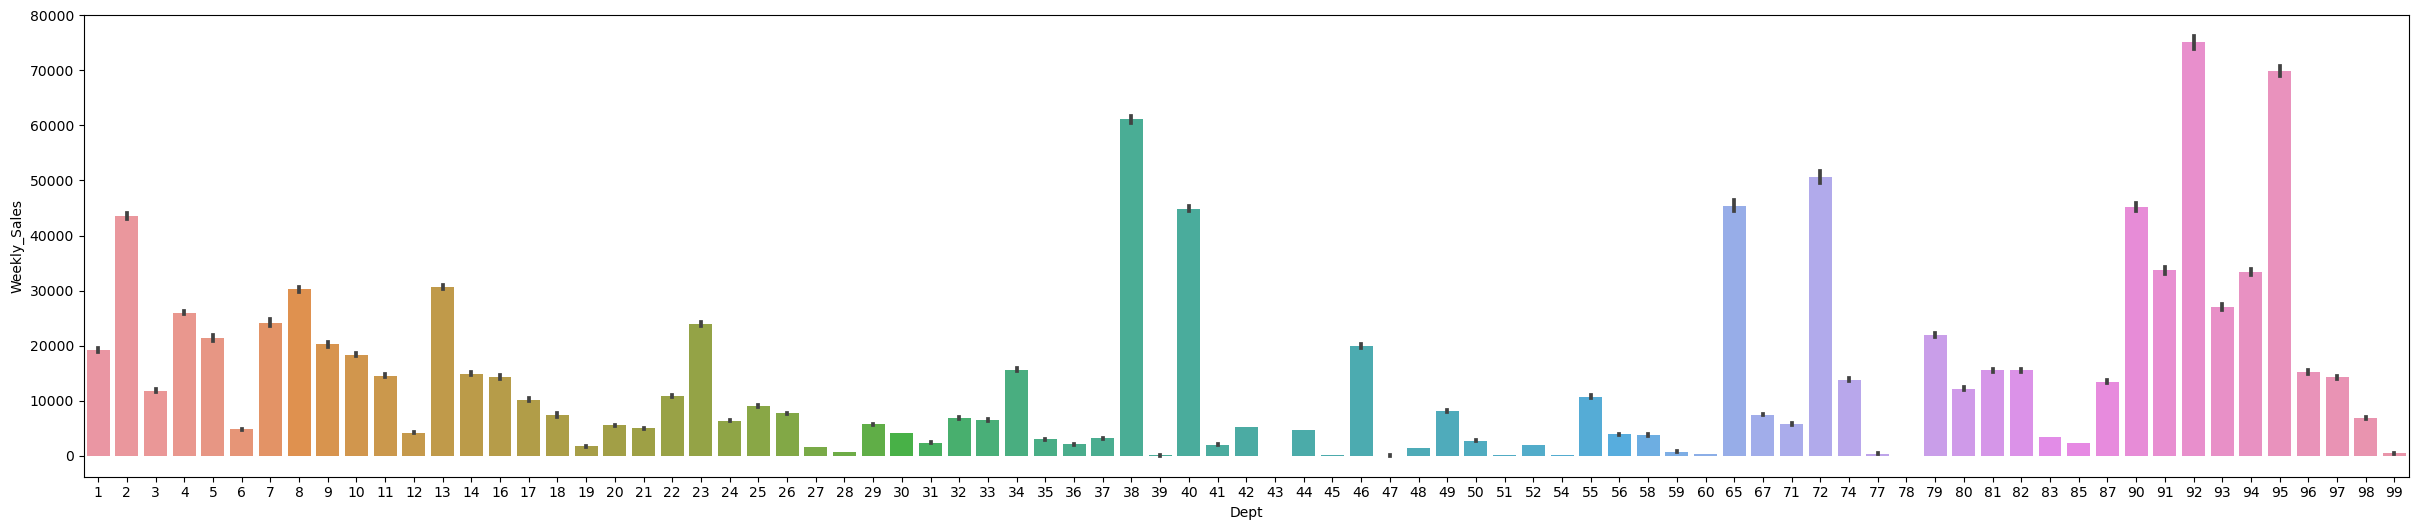

In [16]:
# 商品カテゴリーごとの売り上げの差
plt.figure(figsize=(30,6))
sns.barplot(x="Dept", y="Weekly_Sales", data=df_train)
plt.show()

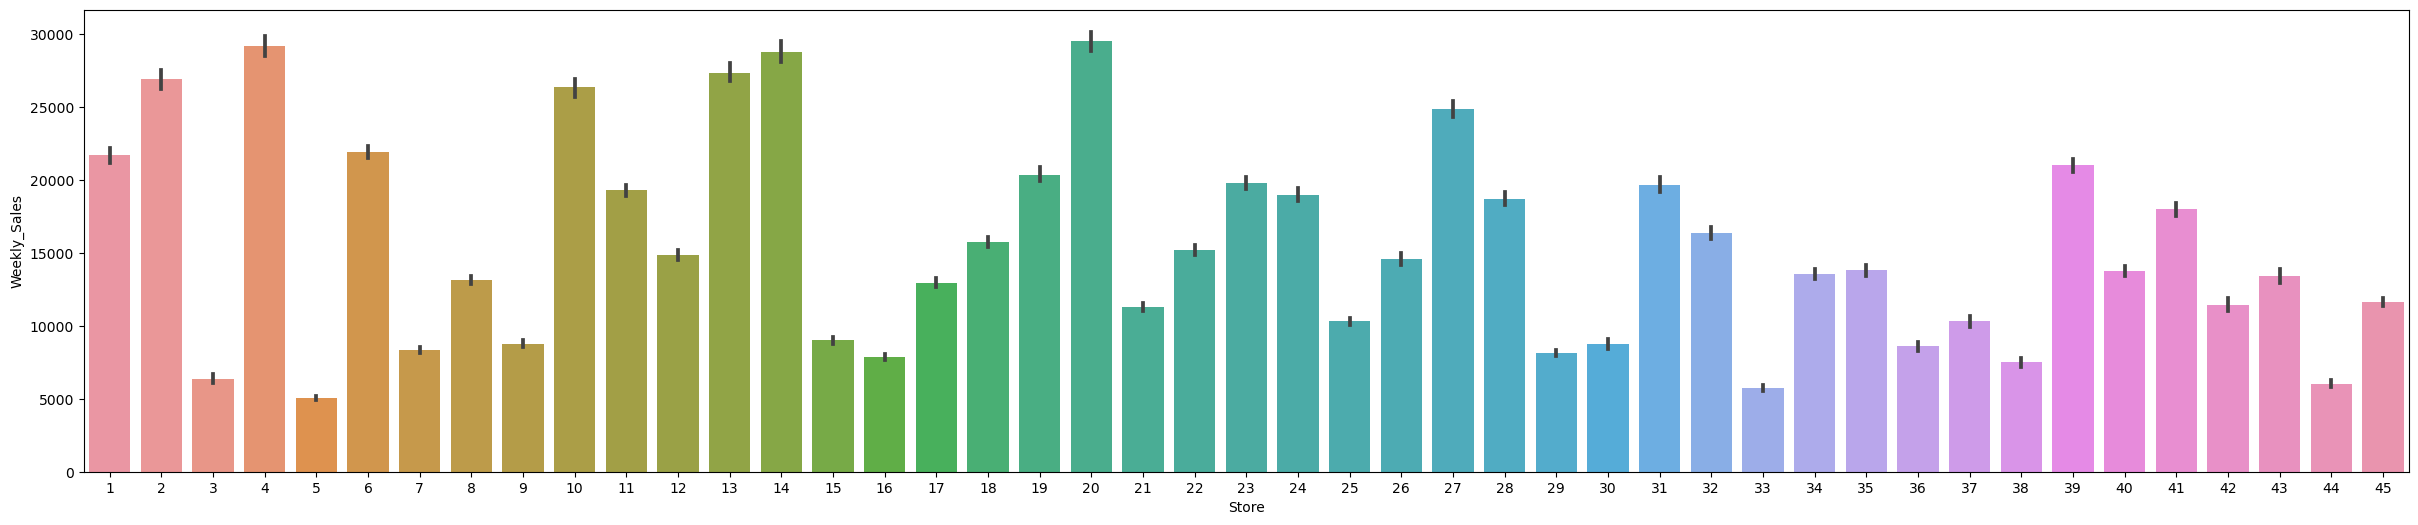

In [17]:
# 店舗ごとの売り上げの差
plt.figure(figsize=(30,6))
sns.barplot(x="Store", y="Weekly_Sales", data=df_train)
plt.show()

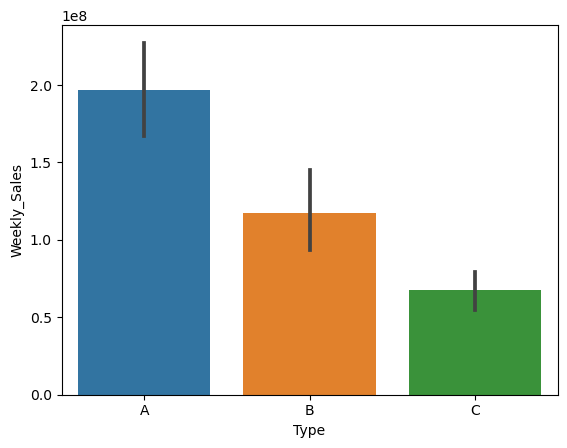

In [18]:
df_tmp = pd.merge(df_train.groupby("Store").sum()[["Weekly_Sales"]].reset_index(), stores)
sns.barplot(x="Type", y="Weekly_Sales", data=df_tmp)
plt.show()

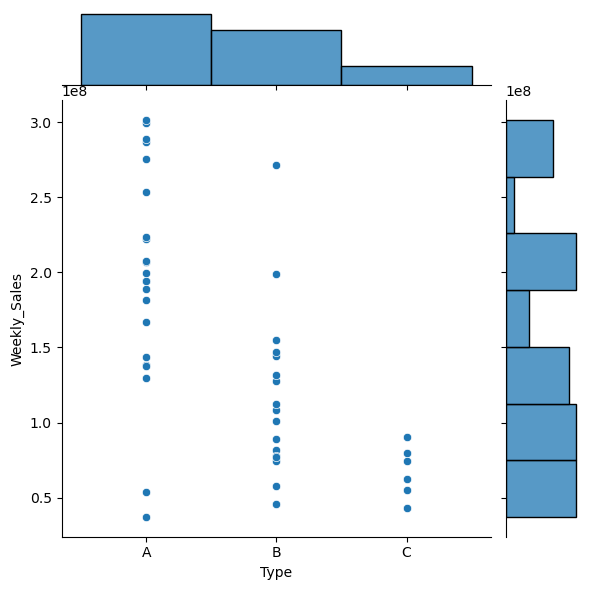

In [19]:
sns.jointplot(x="Type", y="Weekly_Sales", data=df_tmp)
plt.show()

In [20]:
df_tmp

,Store,Weekly_Sales,Type,Size
0,1,2.224028e+08,A,151315
1,2,2.753824e+08,A,202307
2,3,5.758674e+07,B,37392
3,4,2.995440e+08,A,205863
4,5,4.547569e+07,B,34875
5,6,2.237561e+08,A,202505
6,7,8.159828e+07,B,70713
7,8,1.299512e+08,A,155078
8,9,7.778922e+07,B,125833
9,10,2.716177e+08,B,126512


In [21]:
df_tmp = df_train.groupby("Date").sum().reset_index()
df_tmp

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,65124,130557,49750740.50,0
1,2010-02-12,65082,131179,48336677.63,2956
2,2010-02-19,65610,131897,48276993.78,0
3,2010-02-26,65045,130161,43968571.13,0
4,2010-03-05,64897,129670,46871470.30,0
...,...,...,...,...,...
138,2012-09-28,65866,130785,43734899.40,0
139,2012-10-05,66296,132468,47566639.31,0
140,2012-10-12,66453,133371,46128514.25,0
141,2012-10-19,65630,130255,45122410.57,0


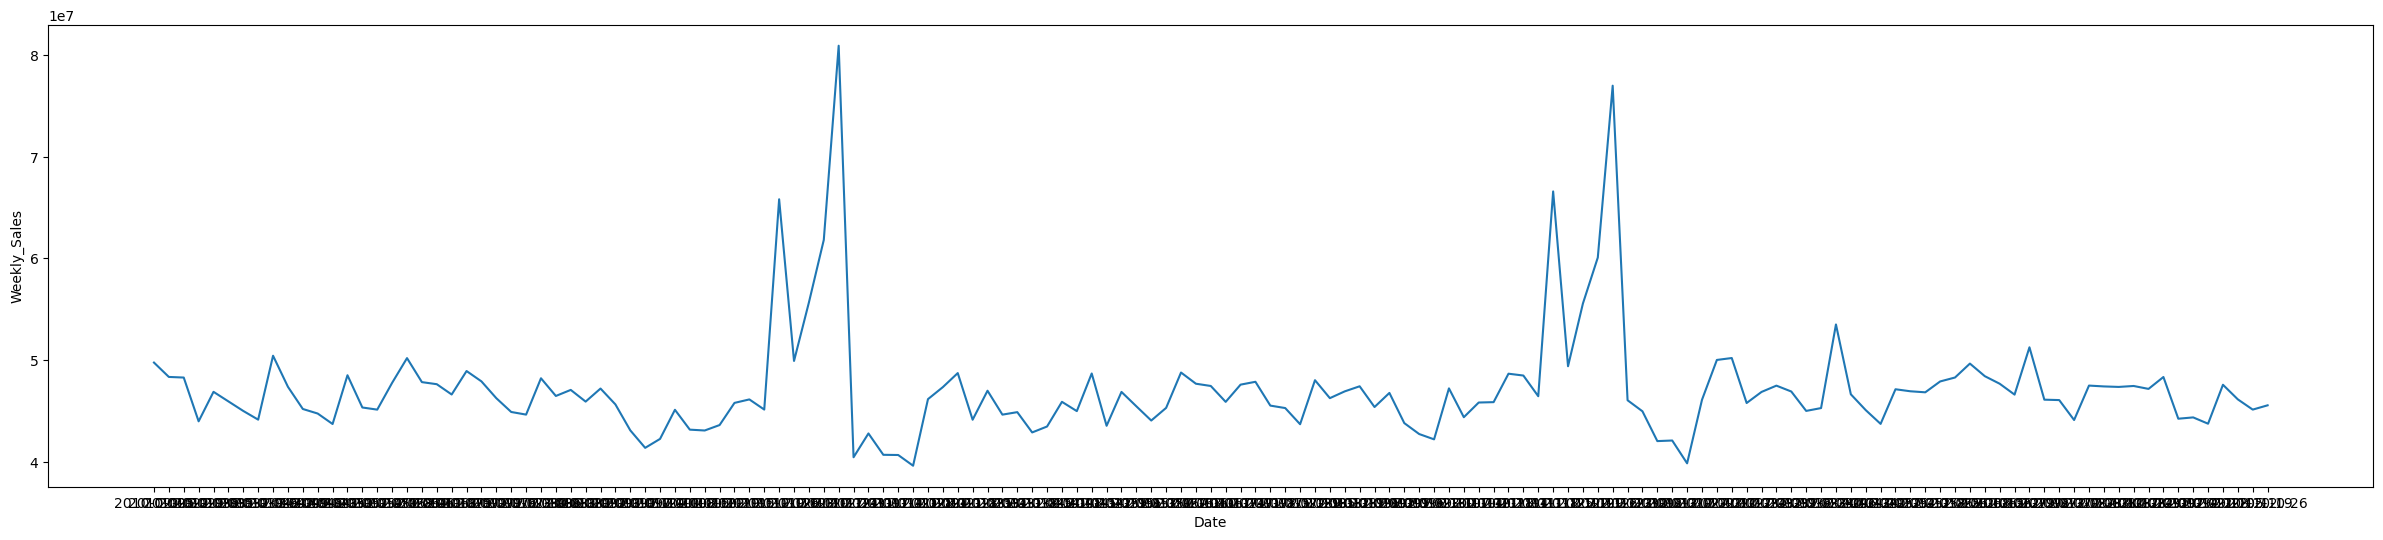

In [22]:
# 日付ごとの売上
plt.figure(figsize=(30,6))
df_tmp = df_train.groupby("Date").sum().reset_index()
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp)
plt.show()

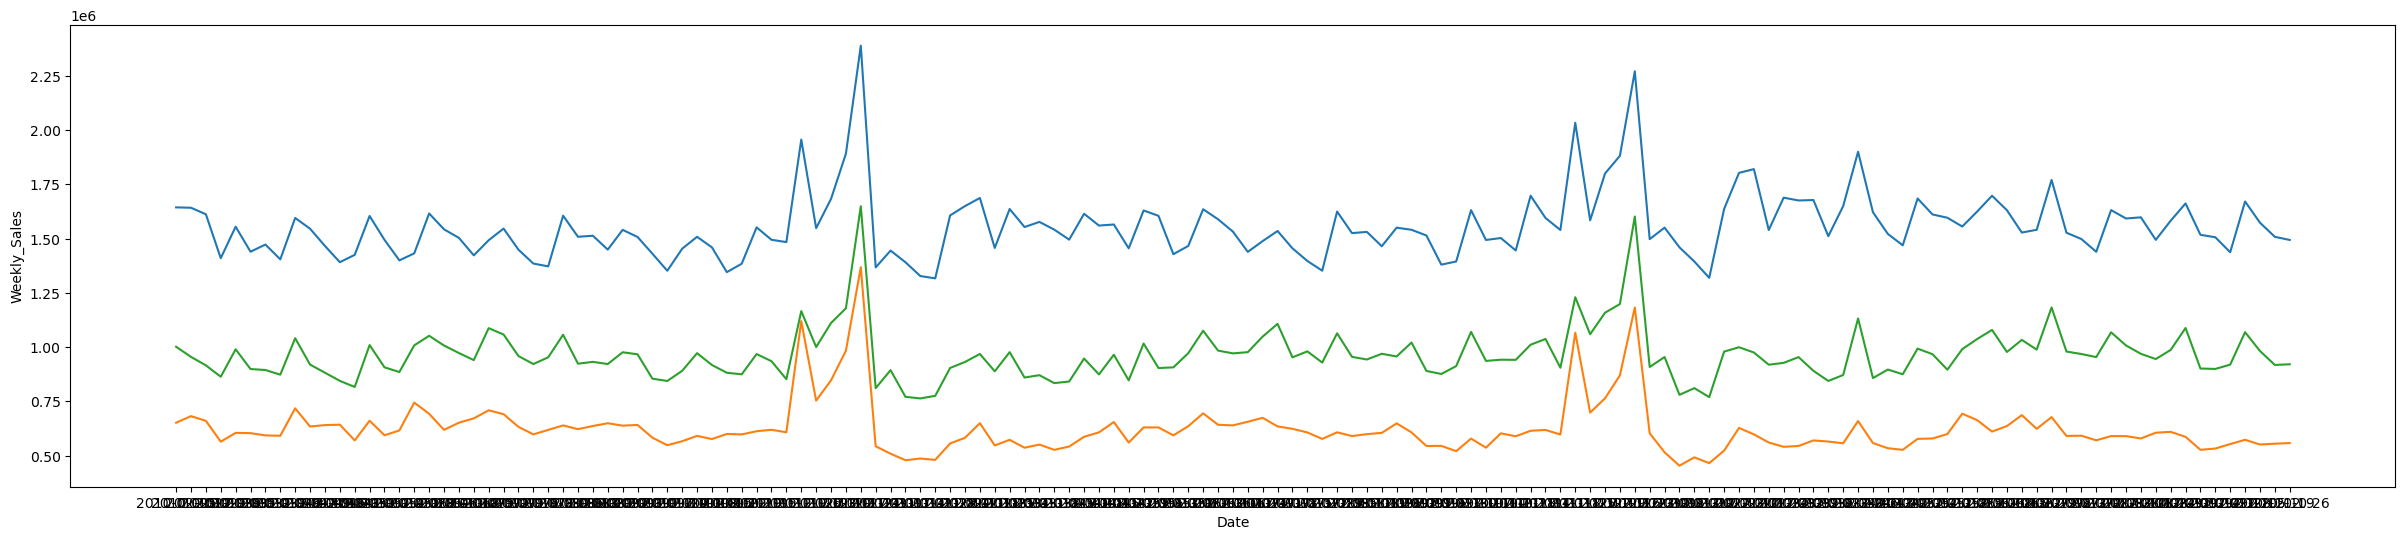

In [23]:
# 店舗別
plt.figure(figsize=(30,6))
df_tmp = df_train.groupby(["Date", "Store"]).sum().reset_index()
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"]==1])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"]==15])
sns.lineplot(x="Date", y="Weekly_Sales", data=df_tmp[df_tmp["Store"]==40])
plt.show()

In [24]:
# 売上の高い日付
df_tmp = df_train.groupby("Date").sum().reset_index()
df_tmp.sort_values("Weekly_Sales", ascending=False).head(10)

,Date,Store,Dept,Weekly_Sales,IsHoliday
46,2010-12-24,65507,130460,80931415.60,0
98,2011-12-23,67073,135571,76998241.31,0
94,2011-11-25,66864,135801,66593605.26,3021
42,2010-11-26,65217,129373,65821003.24,2938
45,2010-12-17,65676,130438,61820799.85,0
97,2011-12-16,66894,134714,60085695.94,0
44,2010-12-10,65354,129960,55666770.39,0
96,2011-12-09,66809,134656,55561147.70,0
113,2012-04-06,66323,132587,53502315.87,0
126,2012-07-06,65939,132367,51253021.88,0


In [25]:
## 前処理

In [27]:
pip install lightgbm


  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.3 MB 550.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.3 MB 731.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 898.2 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 986.4 kB/s eta 0:00:02
   --------- ------------------------------ 0.3/1.3 MB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.3 MB 1.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 1.4 MB/s eta 0:00:01
   ----------------- ---------------

In [28]:
import lightgbm as lgb

In [29]:
df = pd.merge(pd.merge(df_train, stores), feature)

In [30]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [31]:
def term_class(x):
    if int(x[8:10])<10:
        term = 1
    elif int(x[8:10])<20:
        term = 2
    else:
        term = 3
    return term

def preprocess(df):
    df["month"] = df["Date"].apply(lambda x:x[5:7])
    df["term"] = df["Date"].apply(term_class)
    
    for col in ["Store", "Dept", "Type", "month", "term"]:
        df[col] = df[col].astype("category")
    return df

In [32]:
df = preprocess(df)

In [36]:
df_val = df[df["Date"] >= "2012-07-13"]
df_tr = df[df["Date"] < "2012-07-13"]

df_val_x = df_val.drop(["Weekly_Sales", "Date"], axis=1) 
df_tr_x = df_tr.drop(["Weekly_Sales", "Date"], axis=1)
df_val_y = df_val["Weekly_Sales"]
df_tr_y = df_tr["Weekly_Sales"]

In [35]:
trains = lgb.Dataset(df_tr_x, df_tr_y)
valids = lgb.Dataset(df_val_x, df_val_y)

In [37]:
params = {
    "ovjective":"regression", 
    "metric":"mae"  
}

In [38]:
# モデル構築

In [39]:
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=True), lgb.log_evaluation(-1)])

[LightGBM] [Warning] Unknown parameter: ovjective
[LightGBM] [Warning] Unknown parameter: ovjective
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2480
[LightGBM] [Info] Number of data points in the train set: 374203, number of used features: 16
[LightGBM] [Warning] Unknown parameter: ovjective
[LightGBM] [Info] Start training from score 16031.684848
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1000]	valid_0's l1: 1685.8


In [40]:
df_te = pd.merge(pd.merge(df_test, stores), feature)

df_te = preprocess(df_te)

In [41]:
preds =model.predict(df_te.drop("Date", axis=1))

In [42]:
df_te = pd.concat([df_te, pd.DataFrame(preds)], axis=1).rename(columns={0:"Weekly_Sales"})

In [44]:
sbmit["Weekly_Sales"] = df_te.sort_values(["Store", "Dept", "Date"])["Weekly_Sales"]

In [45]:
sbmit.to_csv("submit_csv", index=False)